In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Data Cleaning/Review & Comment Data.xlsx'

In [ ]:
# Read the XLSX file into a DataFrame
df = pd.read_excel(file_path)

REMOVE EMOJI

In [ ]:
import re

def remove_emojis(text):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                           u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                           u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Pictographs
                           u"\U0001F170-\U0001F251"  # Enclosed Characters
                           "]+", flags=re.UNICODE)

    # Remove emojis using the regular expression
    return emoji_pattern.sub(r'', text)

In [ ]:
df['text'] = df['text'].astype(str)
df['text'] = df['text'].apply(remove_emojis)

REMOVE LINK FROM COMMENT

In [ ]:
def remove_links(text):
    return re.sub(r'https?://\S+', '', text)

In [ ]:
df['text'] = df['text'].apply(remove_links)

REMOVE HASHTAG


In [ ]:
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

In [ ]:
df['text'] = df['text'].apply(remove_hashtags)

REMOVE REDUNDANT COMMENT

In [ ]:
df = df.drop_duplicates(subset='text', keep='first')

CHECK IF ANY DUPLICATES EXISTS

In [ ]:
duplicates_exist = df.duplicated().any()

# Print the result
if duplicates_exist:
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


In [ ]:
len(df)

1026

In [ ]:
file_path = '/content/drive/MyDrive/Data Cleaning/output.xlsx'

# Export the DataFrame to the specified Excel file
df.to_excel(file_path, index=False)

print(f"DataFrame exported to {file_path}")

DataFrame exported to /content/drive/MyDrive/Data Cleaning/output.xlsx


In [ ]:
excel_file_path = 'your_excel_file.xlsx'

VISUALIZATION - TOPIC BASED ON HOW MANY COMMENTS

In [ ]:
file_path = '/content/drive/MyDrive/Data Cleaning/Merge.xlsx'

In [ ]:
df = pd.read_excel(file_path)

In [ ]:
df

,postTitle,postDescription,text,likesCount,facebookUrl
0,"Assalaamualaikum. Nk tumpang tanya ni, kut2 or...",NaN,Beli racun anai2 ni.. katanya mapuh abis sampa...,0,https://www.facebook.com/groups/33538423328964...
1,"Assalaamualaikum. Nk tumpang tanya ni, kut2 or...",NaN,Ustaz kazim ada bgtahu suruh bela semut..sbb a...,0,https://www.facebook.com/groups/33538423328964...
2,"Assalaamualaikum. Nk tumpang tanya ni, kut2 or...",NaN,💵💰PINJAMAN WANG BERLESEN 💰💵\nNak Buat Loan Ta...,0,https://www.facebook.com/groups/33538423328964...
3,"Assalaamualaikum. Nk tumpang tanya ni, kut2 or...",NaN,NaN,1,https://www.facebook.com/groups/33538423328964...
4,"Assalaamualaikum. Nk tumpang tanya ni, kut2 or...",NaN,NaN,0,https://www.facebook.com/groups/33538423328964...
...,...,...,...,...,...
9123,Kandang Haram Atas Tapak Rizab Masjid Diroboh\...,NaN,Org kita xpe jgk. Ini puak depa. Lpstu tuntut ...,0,https://fb.watch/noGzFLEEnM/
9124,Kandang Haram Atas Tapak Rizab Masjid Diroboh\...,NaN,pelihara lembu.bukan nya makan lembu,0,https://fb.watch/noGzFLEEnM/
9125,Kandang Haram Atas Tapak Rizab Masjid Diroboh\...,NaN,Buat aper nak ganti2 atau bagi tanah lain ?.. ...,0,https://fb.watch/noGzFLEEnM/
9126,Kandang Haram Atas Tapak Rizab Masjid Diroboh\...,NaN,naik kan masjid.. nama pun tapak haram..,0,https://fb.watch/noGzFLEEnM/


In [ ]:
# Print unique values
print("Unique values in 'shortTitle' column:")
for value in unique_values:
    print(value)

Unique values in 'shortTitle' column:
Solusi Masalah Anai-Anai
Tiada Malidur Rasul Sejak Pas Memerintah
Sampah Sarap
Masalah Rohingnya
Kerja - Kerja Menaiktaraf Pondok Pantai Taiping
 Ulangtahun Permashuran MPK
Air Melimpah di Taman Banggol Permai
Safety Alert
Pengasingan Tempat Duduk Mengikut Jantina
Pohon mercu bekas Pengkalan Kastam Tumbang
Masalah Lembu Berkeliaran
Naib Johan Hari Kebangsaan
Tandas Awam Padang Astaka
Kerja - Kerja Menaiktaraf Prasarana Dan Fasiliti
Aduan Bilangan Parking
Saman Kereta
Mencabut Bendera UMNO
Bendera PAS di Jambatan Geliga Dicabut
Apply Kerja di MPK
Sampah Sarap Dibersih
Majlis Makan Malam MPK
Kawasan busuk, Tangkungan Air
Rumput Tidak Dijaga Rapi
Memotong Ranting Pokok di Jalan Raya
Hari Terbuka Majlis MPK 2016
Membuat Tanah Perkuburan Islam Geliga
Meminta Haiwan Ternakan Tidak Berkeliaran
Lawatan Kerja di Stadium Panasonic
Gotong-Royong
Poster Ceramah Anwar Ibrahim Dicabut
Perlawanan Bola Sepak MPK VS Taman Koperasi Perdana FC ( TKP FC)
Perniaga Tepi

In [ ]:
data = [
    'Aduan lori muatan - Keselamatan Awam',
    'Permintaan kotak',
    'Aduan proses membayar saman',
    'Permintaan pemasangan pagar jalan sepanjang kampung besut - Keselamatan Awam',
    'Aduan saman',
    'Operasi buang puting rokok - Kebersihan',
    'Aduan pekerja mpk',
    'Musim hujan',
    'Lebihan cement - Keselamatan Awam',
    'Aduan pemandu motor tidak berhemah - Keselamatan Awam',
    'Kerosakan Taman Permainan di Padang Astaka - Keselamatan Awam',
    'Ruang Solat di Bazar Ramadhan Padang Astaka',
    'Saman Penjual Buah Tepi Jalan - Tindakan MPK',
    'Tempoh Sah Resit Parking',
    'Permintaan Tong Sampah di Setiap Lorong Rumah',
    'Pokok Kaktus di Tepi Jalan',
    'Jalan Berlubang di Syarikat Mohd Noor Yusof - Keselamatan Awam',
    'Jalan Berlubang di Koperasi Perwaja - Keselamatan Awam',
    'Vandalisme Harta Awam - Fasiliti Awam',
    'Aduan Gangguan Bunyi',
    'Aduan Banting di Traffic Light - Keselamatan Awam',
    'Aduan Pokok Kelapa Hampir Tumbang - Keselamatan Awam',
    'Aduan Roundabout Bukit Mentok',
    'Aduan Sarang Tebuan di Pantai Mok Nik - Haiwan',
    'Aduan Anjing Liar - Haiwan',
    'Larangan Berbuka Puasa di Padang Astaka - Kebersihan',
    'Aduan Taman Permainan di Pantai Mok Nik - Keselamatan Awam',
    'Aduan Lembu Berkeliaran di Taman Permainan - Haiwan',
    'Aduan Jawantan Kosong MPK',
    'Aduan Tiang Lampu Hampir Tumbang - Keselamatan Awam',
    'Aduan Jalan Rosak di Kawasan Perindustrian Teluk Kalong - Keselamatan Awam',
    'Aduan Penunggang Motor di Laluan Pejalan Kaki - Keselamatan Awam',
    'Aduan Lori Bauksit di Jalan Geliga - Keselamatan Awam',
    'Aduan Lori Bauksit - Keselamatan Awam',
    'Aduan Kerbau Berkeliaran di Jalan Raya - Haiwan',
    'Permintaan Membina Bonggol',
    'Aduan Kipas Berkarat di Surau Pantai Mok Nik - Keselamatan Awam',
    'Cadangan Memajukan Tapak Sawmill di Jambatan Geliga',
    'Aduan Traffic Light',
    'Aduan Pembuangan Sampah Secara Haram - Kebersihan'
]

# Iterate through the data and print lines with '-' and without it separately
print("Lines with '-' separator:")
for line in data:
    if '-' in line:
        print(line)

print("\nLines without '-' separator:")
for line in data:
    if '-' not in line:
        print(line)


Lines with '-' separator:
Aduan lori muatan - Keselamatan Awam
Permintaan pemasangan pagar jalan sepanjang kampung besut - Keselamatan Awam
Operasi buang puting rokok - Kebersihan
Lebihan cement - Keselamatan Awam
Aduan pemandu motor tidak berhemah - Keselamatan Awam
Kerosakan Taman Permainan di Padang Astaka - Keselamatan Awam
Saman Penjual Buah Tepi Jalan - Tindakan MPK
Jalan Berlubang di Syarikat Mohd Noor Yusof - Keselamatan Awam
Jalan Berlubang di Koperasi Perwaja - Keselamatan Awam
Vandalisme Harta Awam - Fasiliti Awam
Aduan Banting di Traffic Light - Keselamatan Awam
Aduan Pokok Kelapa Hampir Tumbang - Keselamatan Awam
Aduan Sarang Tebuan di Pantai Mok Nik - Haiwan
Aduan Anjing Liar - Haiwan
Larangan Berbuka Puasa di Padang Astaka - Kebersihan
Aduan Taman Permainan di Pantai Mok Nik - Keselamatan Awam
Aduan Lembu Berkeliaran di Taman Permainan - Haiwan
Aduan Tiang Lampu Hampir Tumbang - Keselamatan Awam
Aduan Jalan Rosak di Kawasan Perindustrian Teluk Kalong - Keselamatan Awam
A

In [ ]:
from collections import Counter

In [ ]:

# List of strings
strings = [
        'Solusi Masalah Anai-Anai',
       'Tiada Malidur Rasul Sejak Pas Memerintah', 'Sampah Sarap',
       'Masalah Rohingnya',
       'Kerja - Kerja Menaiktaraf Pondok Pantai Taiping',
       ' Ulangtahun Permashuran MPK',
       'Air Melimpah di Taman Banggol Permai', 'Safety Alert',
       'Pengasingan Tempat Duduk Mengikut Jantina',
       'Pohon mercu bekas Pengkalan Kastam Tumbang',
       'Masalah Lembu Berkeliaran', 'Naib Johan Hari Kebangsaan',
       'Tandas Awam Padang Astaka',
       'Kerja - Kerja Menaiktaraf Prasarana Dan Fasiliti',
       'Aduan Bilangan Parking', 'Saman Kereta', 'Mencabut Bendera UMNO',
       'Bendera PAS di Jambatan Geliga Dicabut', 'Apply Kerja di MPK',
       'Sampah Sarap Dibersih', 'Majlis Makan Malam MPK',
       'Kawasan busuk, Tangkungan Air', 'Rumput Tidak Dijaga Rapi',
       'Memotong Ranting Pokok di Jalan Raya',
       'Hari Terbuka Majlis MPK 2016',
       'Membuat Tanah Perkuburan Islam Geliga',
       'Meminta Haiwan Ternakan Tidak Berkeliaran',
       'Lawatan Kerja di Stadium Panasonic', 'Gotong-Royong',
       'Poster Ceramah Anwar Ibrahim Dicabut',
       'Perlawanan Bola Sepak MPK VS Taman Koperasi Perdana FC ( TKP FC)',
       'Perniaga Tepi Jalan Perlu Mempunyai Permit',
       'Masalah Jalan susur keluar dari simpang Kg Pasir Minal menghala ke bandar ',
       'Masalah di Waterfront Geliga ',
       'Kesan Penutupan Centre Point Kemaman', 'Penebangan Pokok',
       'Kemalangan Disebabkan Lebihan Cement di Atas Jalan',
       'Siasatan dan Pengiraan Kos Membaik Pulih Wakaf Waterfront Geliga',
       'Cadangan Membina Dewan Terbuka Baharu di Padang Astaka',
       'Memohon Tempat Kerja di MPK',
       'Keadaan Taman Mainan Pantai Moknik',
       'Perbincangan Susunatur Gerai Peniaga di Kuala Kerteh',
       'Kandang Haram Atas Tapak Rizab Masjid Diroboh',
       'Replika Botol di Pantai Kuala Kertih',
       'Kerja - Kerja Penyelenggaraan', 'Jawatan Kosong Di MPK',
       'Pengalaman Beli Koupon Parking', 'Aduan signboard',
       'Aduan lubang', 'Permintaan pernambahan lokasi jual kupon',
       'Aduan jalan dari balai polis ke traffic light batu 2',
       'Aduan tandas pantai mok nik', 'Keceriaan bandar chukai',
       'Kekurangan air ketika musim hujan',
       'Proses meminta lesen berniaga', 'Aduan lori muatan',
       'Permintaan kotak', 'Aduan proses membayar saman',
       'Permintaan pemasangan pagar jalan sepanjang kampung besut',
       'Aduan saman', 'Operasi buang puting rokok', 'Aduan pekerja mpk',
       'Musim hujan', 'Lebihan cement',
       'Aduan pemandu motor tidak berhemah',
       'Kerosakan Taman Permainan di Padang Astaka',
       'Ruang Solat di Bazar Ramadhan Padang Astaka',
       'Saman Penjual Buah Tepi Jalan', 'Tempoh Sah Resit Parking',
       'Permintaan Tong Sampah di Setiap Lorong Rumah',
       'Pokok Kaktus di Tepi Jalan',
       'Jalan Berlubang di Syarikat Mohd Noor Yusof',
       'Jalan Berlubang di Koperasi Perwaja', 'Vandalisme Harta Awam',
       'Aduan Gangguan Bunyi', 'Aduan Banting di Traffic Light',
       'Aduan Pokok Kelapa Hampir Tumbang',
       'Aduan Roundabout Bukit Mentok',
       'Aduan Sarang Tebuan di Pantai Mok Nik', 'Aduan Anjing Liar',
       'Larangan Berbuka Puasa di Padang Astaka',
       'Aduan Taman Permainan di Pantai Mok Nik',
       'Aduan Lembu Berkeliaran di Taman Permainan',
       'Aduan Jawantan Kosong MPK', 'Aduan Tiang Lampu Hampir Tumbang',
       'Aduan Jalan Rosak di Kawasan Perindustrian Teluk Kalong',
       'Aduan Penunggang Motor di Laluan Pejalan Kaki',
       'Aduan Lori Bauksit di Jalan Geliga', 'Aduan Lori Bauksit',
       'Aduan Kerbau Berkeliaran di Jalan Raya',
       'Permintaan Membina Bonggol',
       'Aduan Kipas Berkarat di Surau Pantai Mok Nik',
       'Cadangan Memajukan Tapak Sawmill di Jambatan Geliga',
       'Aduan Traffic Light', 'Aduan Pembuangan Sampah Secara Haram'
]

# Combine all strings into one big text
text = ' '.join(strings)

word_frequencies = Counter(text.split())

# Get the top 10 most frequent words
top_10_words = word_frequencies.most_common(30)

# Print the top 10 words and their frequencies
for word, frequency in top_10_words:
    print(f'{word}: {frequency}')

di: 28
Aduan: 28
Jalan: 11
Kerja: 9
MPK: 8
Pantai: 6
Taman: 6
Geliga: 6
Masalah: 5
Padang: 5
Astaka: 5
Permintaan: 5
Sampah: 4
Berkeliaran: 4
Pokok: 4
-: 3
Tumbang: 3
Parking: 3
Tepi: 3
Permainan: 3
Mok: 3
Nik: 3
Sarap: 2
Menaiktaraf: 2
Air: 2
Tempat: 2
Lembu: 2
Hari: 2
Awam: 2
Saman: 2


In [ ]:
comment_counts = df.groupby('postTitle')['comment'].count().reset_index()

# Rename the 'comment' column to 'commentCount' for clarity
comment_counts = comment_counts.rename(columns={'comment': 'commentCount'})

# Print the comment counts for each postTitle
print(comment_counts)

HORIZONTAL BAR CHART

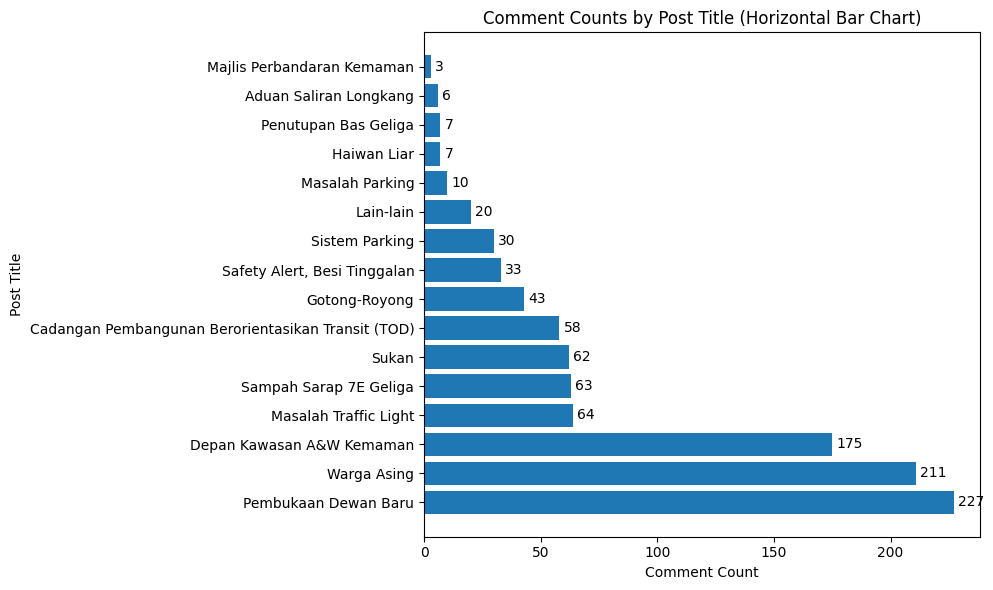

In [ ]:
comment_counts = df.groupby('postTitle')['comment'].count().reset_index()

# Rename the 'comment' column to 'commentCount' for clarity
comment_counts = comment_counts.rename(columns={'comment': 'commentCount'})

# Sort the data by commentCount in descending order for better visualization
comment_counts = comment_counts.sort_values(by='commentCount', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = plt.barh(comment_counts['postTitle'], comment_counts['commentCount'])
plt.xlabel('Comment Count')
plt.ylabel('Post Title')
plt.title('Comment Counts by Post Title (Horizontal Bar Chart)')

# Add values on the right of the bars
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{width}',
                 xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(3, 0),  # 3 points horizontal offset
                 textcoords="offset points",
                 ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()


REPLACE TEXT

In [ ]:
file_path = '/content/drive/MyDrive/Data Cleaning/Data_merge_revision.xlsx'

In [ ]:
df = pd.read_excel(file_path)

In [ ]:
# Define the column name where you want to perform the replacement
column_name = 'shortTitle'

# Define the string to search for in each cell
search_string =  'Aduan Penunggang Motor di Laluan Pejalan Kaki'
replacement_string = 'Keselamatan Awam'
# Iterate through the DataFrame and replace only the rows where the search string exists
for index, row in df.iterrows():
    if search_string in str(row[column_name]):
        df.at[index, 'Kategori'] = replacement_string

In [ ]:
new_fila_path = '/content/drive/MyDrive/Data Cleaning/Data_merge_revision.xlsx'

In [ ]:
# Export the DataFrame to the specified Excel file
df.to_excel(new_fila_path, index=False)

print(f"DataFrame exported to {new_fila_path }")

DataFrame exported to /content/drive/MyDrive/Data Cleaning/Data_merge_revision.xlsx


In [ ]:
pip install pandas googletrans==4.0.0-rc1 openpyxl

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=e7509de457bd5bc73950fe8d47b6075f567a7d0e60654e8ee481cd0aaf7c4886
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

In [ ]:
import pandas as pd
from googletrans import Translator
from googletrans.constants import LANGUAGES
from openpyxl import load_workbook

'''
excel_file = '/content/drive/MyDrive/Data Cleaning/Testing.xlsx'  # Replace with your Excel file path
df = pd.read_excel(excel_file)

# Translate the text in the specified column (e.g., 'TextColumn') and store the translations in a new column
df['Translated_Text'] = df['text'].apply(translate_text)

# Save the translated data back to the Excel file
with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
    writer.book = load_workbook(excel_file)
    df.to_excel(writer, sheet_name='New_sheet', index=False)

print("Translation complete. Data saved to Excel file.")
'''

'\nexcel_file = \'/content/drive/MyDrive/Data Cleaning/Testing.xlsx\'  # Replace with your Excel file path\ndf = pd.read_excel(excel_file)\n\n# Translate the text in the specified column (e.g., \'TextColumn\') and store the translations in a new column\ndf[\'Translated_Text\'] = df[\'text\'].apply(translate_text)\n\n# Save the translated data back to the Excel file\nwith pd.ExcelWriter(excel_file, engine=\'openpyxl\') as writer:\n    writer.book = load_workbook(excel_file)\n    df.to_excel(writer, sheet_name=\'New_sheet\', index=False)\n\nprint("Translation complete. Data saved to Excel file.")\n'

In [ ]:
!pip install pandas
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Dataset.xlsx'

In [ ]:
df = pd.read_excel(file_path)

df['Year'] = df['Date'].dt.year

# Save the modified data to a new Excel file
output_excel_file = 'output_excel_file.xlsx'
df.to_excel(output_excel_file, index=False)

file_output = '/content/drive/MyDrive/Dataset_Clean.xlsx'
print("Year extracted and saved to", file_output)

Year extracted and saved to /content/drive/MyDrive/Dataset_Clean.xlsx
